<h1>Capítulo 10</h1>

#data: https://www.cengage.com/aise/economics/wooldridge_3e_datasets/, em statafiles.zip

In [1]:
library(foreign);library(tidyverse);library(pdfetch);library(dynlm);library(lmtest);library(car);library(stargazer)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"


ERROR: Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'glue'


Warning message:
"package 'pdfetch' was built under R version 3.6.3"
Warning message:
"package 'dynlm' was built under R version 3.6.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 3.6.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'lmtest' was built under R version 3.6.3"
Warning message:
"package 'car' was built under R version 3.6.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 3.6.3"

Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




In [4]:
intdef <- read.dta("http://fmwww.bc.edu/ec-p/data/wooldridge/intdef.dta")
head(intdef)

,year,i3,inf,rec,out,def,i3_1,inf_1,def_1,ci3,cinf,cdef,y77
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1948,1.04,8.1,16.2,11.6,-4.6000004,NA,NA,NA,NA,NA,NA,0
2,1949,1.10,-1.2,14.5,14.3,-0.1999998,1.04,8.1,-4.6000004,0.06000006,-9.3,4.400001,0
3,1950,1.22,1.3,14.4,15.6,1.2000008,1.10,-1.2,-0.1999998,0.12000000,2.5,1.400001,0
4,1951,1.55,7.9,16.1,14.2,-1.9000006,1.22,1.3,1.2000008,0.32999992,6.6,-3.100001,0
5,1952,1.77,1.9,19.0,19.4,0.3999996,1.55,7.9,-1.9000006,0.22000003,-6.0,2.300000,0
6,1953,1.93,0.8,18.7,20.4,1.6999989,1.77,1.9,0.3999996,0.15999997,-1.1,1.299999,0


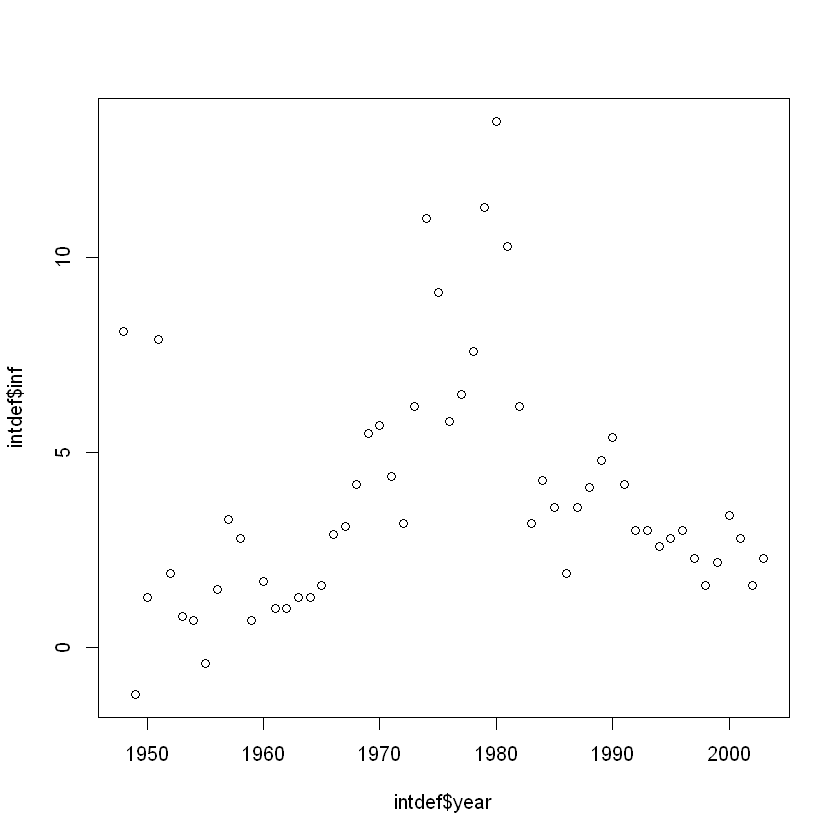

In [5]:
df = data.frame(intdef)
plot(intdef$year,intdef$inf)

In [6]:
summary(lm(i3~inf+def, data=intdef))


Call:
lm(formula = i3 ~ inf + def, data = intdef)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9948 -1.1694  0.1959  0.9602  4.7224 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.73327    0.43197   4.012  0.00019 ***
inf          0.60587    0.08213   7.376 1.12e-09 ***
def          0.51306    0.11838   4.334 6.57e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.843 on 53 degrees of freedom
Multiple R-squared:  0.6021,	Adjusted R-squared:  0.5871 
F-statistic: 40.09 on 2 and 53 DF,  p-value: 2.483e-11


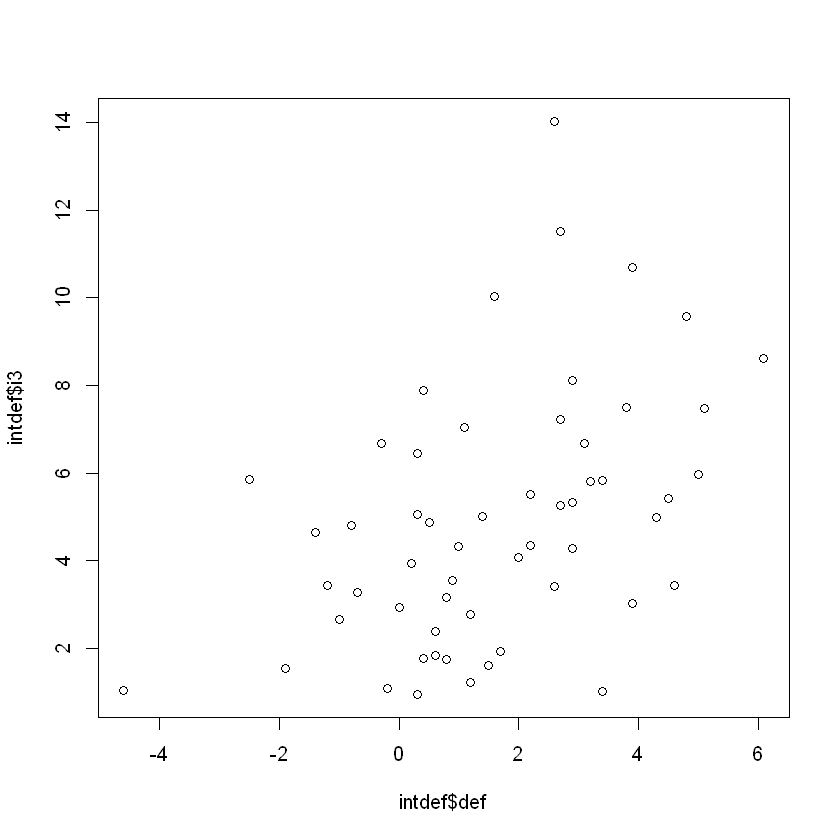

In [7]:
plot(intdef$def,intdef$i3)

In [ ]:
#exemplo de serie equiespacada: barium

In [8]:
barium = read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\BARIUM.dta")
head(barium)

Warning message in read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\BARIUM.dta"):
"cannot read factor labels from Stata 5 files"


,chnimp,bchlimp,befile6,affile6,afdec6,befile12,affile12,afdec12,chempi,gas,...,apr,may,jun,jul,aug,sep,oct,nov,dec,percchn
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,220.4620,9578.376,0,0,0,0,0,0,100.1,7830000128,...,0,0,0,0,0,0,0,0,0,2.3016636
2,94.7980,11219.480,0,0,0,0,0,0,100.9,8819999744,...,0,0,0,0,0,0,0,0,0,0.8449411
3,219.3575,9719.900,0,0,0,0,0,0,101.1,8449999872,...,1,0,0,0,0,0,0,0,0,2.2567875
4,317.4215,12920.950,0,0,0,0,0,0,102.5,9240000512,...,0,1,0,0,0,0,0,0,0,2.4566422
5,114.6390,9790.446,0,0,0,0,0,0,104.1,9150000128,...,0,0,1,0,0,0,0,0,0,1.1709272
6,129.5240,11020.470,0,0,0,0,0,0,104.8,9520000000,...,0,0,0,1,0,0,0,0,0,1.1753038


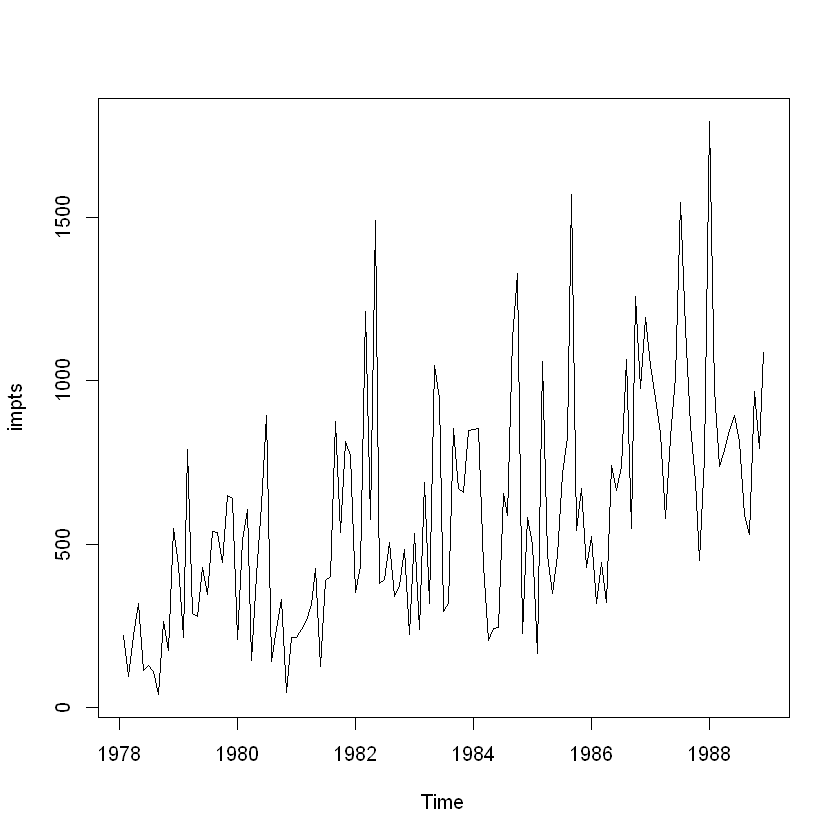

In [10]:
#colocando em ts (comeca no 2º mes de 1978)
impts = ts(barium$chnimp, start=c(1978,2), frequency=12)
plot(impts)

#lidar com series temporais irregulares (nao equiespacadas) é com o zoo

In [11]:
#pdfetch: base de dados com varios orgaos gov dos USA [NAO FUNCIONA]
library(pdfetch)
tickernames = c("^gspc", "^ixic", "AAPL")
yahoo = pdfetch_YAHOO(tickernames, fields="adjclose", from="2000-01-01")

In [12]:
#exemplo 10.4: FDL(finite distributed lag models) testando os fatores que
#mudam a fertilidade(ww2, pilula anticoncepcional e personal tax

fertilidade = read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\FERTIL3.dta")

head(fertilidade)

Warning message in read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\FERTIL3.dta"):
"cannot read factor labels from Stata 5 files"


,gfr,pe,year,t,tsq,pe_1,pe_2,pe_3,pe_4,pill,...,cpe_1,cpe_2,cpe_3,cpe_4,gfr_1,cgfr_1,cgfr_2,cgfr_3,cgfr_4,gfr_2
,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,124.7,0.00,1913,1,1,NA,NA,NA,NA,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,126.6,0.00,1914,2,4,0.00,NA,NA,NA,0,...,NA,NA,NA,NA,124.7,NA,NA,NA,NA,NA
3,125.0,0.00,1915,3,9,0.00,0,NA,NA,0,...,0.00,NA,NA,NA,126.6,1.900002,NA,NA,NA,124.7
4,123.4,0.00,1916,4,16,0.00,0,0,NA,0,...,0.00,0,NA,NA,125.0,-1.599998,1.900002,NA,NA,126.6
5,121.0,19.27,1917,5,25,0.00,0,0,0,0,...,0.00,0,0,NA,123.4,-1.599998,-1.599998,1.900002,NA,125.0
6,119.8,23.94,1918,6,36,19.27,0,0,0,0,...,19.27,0,0,0,121.0,-2.400002,-1.599998,-1.599998,1.900002,123.4


In [13]:
tsdata = ts(fertilidade, start=1913) #le por ano
#L(x) é x lagado uma vez; L(x, p) é x lagado p tempos

In [14]:
res = dynlm(gfr ~ pe + L(pe) + L(pe, 2) + ww2 + pill, data=tsdata)
coeftest(res)


t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)  95.8704975   3.2819571 29.2114 < 2.2e-16 ***
pe            0.0726718   0.1255331  0.5789    0.5647    
L(pe)        -0.0057796   0.1556629 -0.0371    0.9705    
L(pe, 2)      0.0338268   0.1262574  0.2679    0.7896    
ww2         -22.1264975  10.7319716 -2.0617    0.0433 *  
pill        -31.3049888   3.9815591 -7.8625 5.634e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


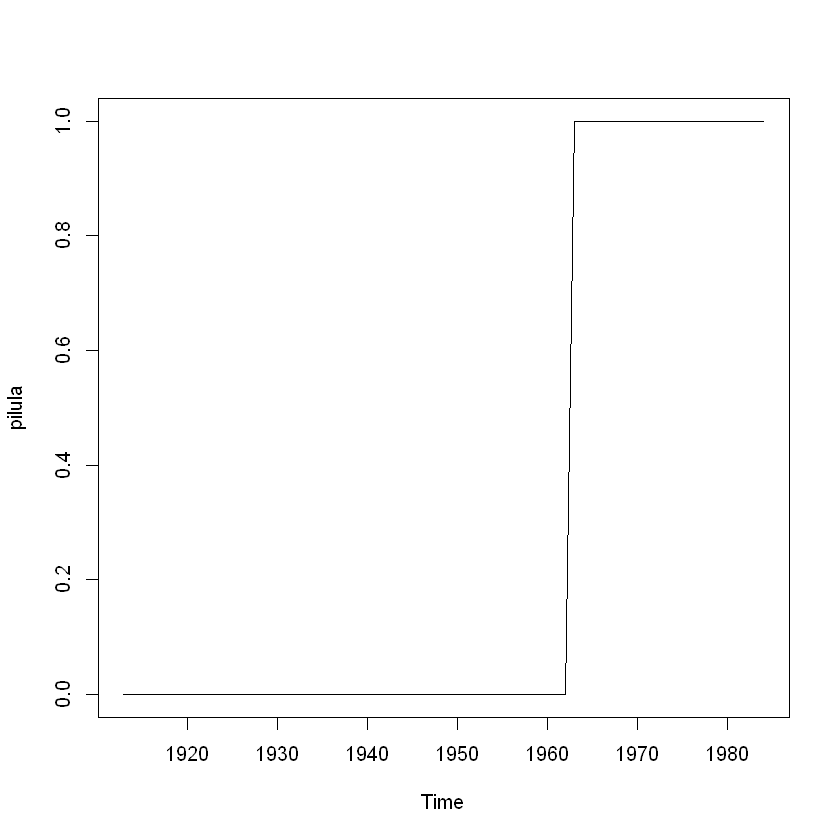

In [15]:
pilula = ts(fertilidade$pill, start=1913) #dummy zzz
plot(pilula)


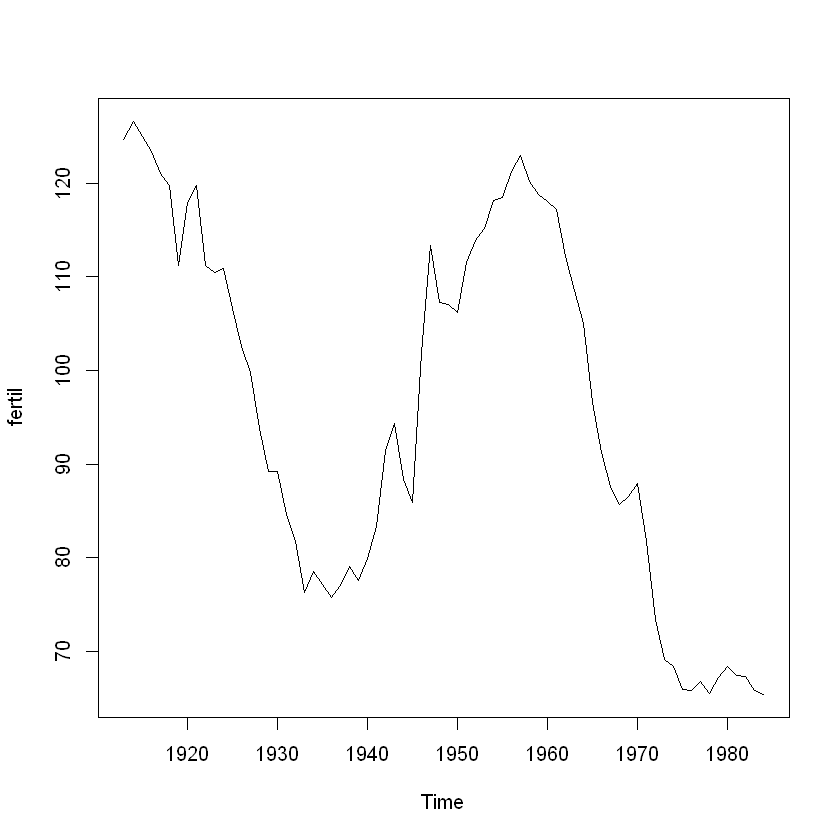

In [16]:
fertil = ts(fertilidade$gfr, start=1913) #dummy zzz
plot(fertil)

In [17]:
#F teste para H0: todos os coeficientes sao zero

linearHypothesis(res, matchCoefs(res,"pe")) # o 0.01165 aponta para um problema 
								 # de multicolinearidade


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,67,15459.75,NA,NA,NA,NA
2,64,13032.64,3,2427.104,3.972964,0.01165201


In [18]:
#calculando a propensao de LP, onde somasse os deltas

b=coef(res)
b
b['pe']+b['L(pe)']+b['L(pe, 2)']


(Intercept)            pe         L(pe)      L(pe, 2)           ww2 
 95.870497467   0.072671828  -0.005779582   0.033826844 -22.126497512 
         pill 
-31.304988800

pe 
0.1007191

In [19]:

#F teste para H0: LRP = 0

linearHypothesis(res, "pe + L(pe) + L(pe, 2) = 0") #é significativo

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,65,15358.41,NA,NA,NA,NA
2,64,13032.64,1,2325.765,11.42124,0.001240844


In [20]:
#exemplo 10.7: trends nos precos das casas (sem o trend sao significativos)

hseinv = read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\hseinv.dta")

tsdata=ts(hseinv, start=1947)

Warning message in read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\hseinv.dta"):
"cannot read factor labels from Stata 5 files"


In [21]:
#LM com lags mas sem trend
res1 = dynlm(log(invpc) ~ log(price), data=tsdata)   #preco signicativo

#LM com trend e lags
res2 = dynlm(log(invpc) ~ log(price) + trend(tsdata), data=tsdata) #preco nao é

stargazer(res1, res2, type='text')


                                 Dependent variable:             
                    ---------------------------------------------
                                     log(invpc)                  
                             (1)                    (2)          
-----------------------------------------------------------------
log(price)                 1.241***                -0.381        
                           (0.382)                (0.679)        
                                                                 
trend(tsdata)                                     0.010***       
                                                  (0.004)        
                                                                 
Constant                  -0.550***              -0.913***       
                           (0.043)                (0.136)        
                                                                 
-----------------------------------------------------------------
Observati

In [23]:
#exemplo 10.11: sazonalidade no dataset do bario

barium = read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\BARIUM.dta")
tsdata = ts(barium, start=c(1978,2), frequency=12)

res = dynlm(log(chnimp) ~ log(chempi)+log(gas)+log(rtwex)+befile6+ affile6+afdec6+season(tsdata), data=tsdata)
coeftest(res)	#nao sao significativas		

Warning message in read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\BARIUM.dta"):
"cannot read factor labels from Stata 5 files"



t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)       16.7792155 32.4286452  0.5174   0.60587    
log(chempi)        3.2650621  0.4929302  6.6238 1.236e-09 ***
log(gas)          -1.2781403  1.3890083 -0.9202   0.35944    
log(rtwex)         0.6630453  0.4713037  1.4068   0.16222    
befile6            0.1397028  0.2668075  0.5236   0.60158    
affile6            0.0126324  0.2786866  0.0453   0.96393    
afdec6            -0.5213004  0.3019499 -1.7264   0.08700 .  
season(tsdata)Feb -0.4177110  0.3044444 -1.3720   0.17277    
season(tsdata)Mar  0.0590520  0.2647307  0.2231   0.82389    
season(tsdata)Apr -0.4514830  0.2683864 -1.6822   0.09529 .  
season(tsdata)May  0.0333090  0.2692425  0.1237   0.90176    
season(tsdata)Jun -0.2063315  0.2692515 -0.7663   0.44509    
season(tsdata)Jul  0.0038366  0.2787666  0.0138   0.98904    
season(tsdata)Aug -0.1570645  0.2779927 -0.5650   0.57320    
season(tsdata)Sep -0.1341605  0.2676556 -0.5